In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
#loading dataset
data=pd.read_csv("election_data.csv")
data.head()

,Election-id,Result,Year,Amount Spent,Popularity Rank
0,NaN,NaN,NaN,NaN,NaN
1,122.0,0.0,32.0,3.81,3.0
2,315.0,1.0,48.0,6.32,2.0
3,201.0,1.0,51.0,3.67,1.0
4,965.0,0.0,40.0,2.93,4.0


In [6]:
data=data.drop(data.index[0])
data.head()

,Election-id,Result,Year,Amount Spent,Popularity Rank
1,122.0,0.0,32.0,3.81,3.0
2,315.0,1.0,48.0,6.32,2.0
3,201.0,1.0,51.0,3.67,1.0
4,965.0,0.0,40.0,2.93,4.0
5,410.0,1.0,52.0,3.60,1.0


In [15]:
data.columns=['Election-id','Result','Year','amt','pop_rank']
data.head()

,Election-id,Result,Year,amt,pop_rank
1,122.0,0.0,32.0,3.81,3.0
2,315.0,1.0,48.0,6.32,2.0
3,201.0,1.0,51.0,3.67,1.0
4,965.0,0.0,40.0,2.93,4.0
5,410.0,1.0,52.0,3.60,1.0


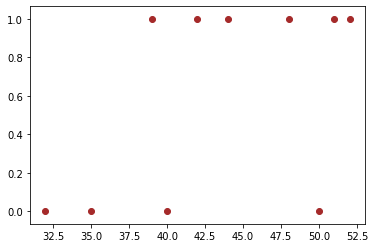

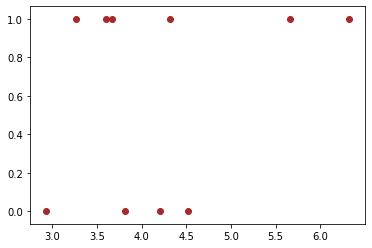

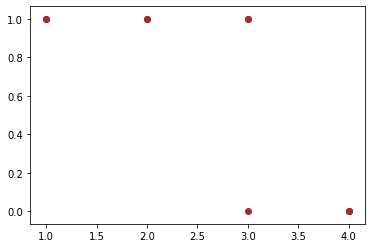

In [35]:
#EDA
data.shape
data.dtypes
data.isna
data.describe()

data.groupby('Result').mean()


plt.scatter(x=data['Year'],y=data['Result'],color="brown")
plt.show()
plt.scatter(x=data['amt'],y=data['Result'],color="brown")
plt.show()
plt.scatter(x=data['pop_rank'],y=data['Result'],color="brown")
plt.show()

In [21]:
### Splitting the data into train and test data 
from sklearn.model_selection import train_test_split
train_data,test_data = train_test_split(data,test_size = 0.3) # 30% test data

In [29]:
# Model building 
import statsmodels.formula.api as sm
data.head()

logit_model = sm.logit('Result ~ amt+pop_rank',data = train_data).fit()

         Current function value: 0.272690
         Iterations: 35


C:\Users\Rajesh\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [30]:
#summary
logit_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Result   No. Observations:                    7
Model:                          Logit   Df Residuals:                        4
Method:                           MLE   Df Model:                            2
Date:                Sat, 25 Apr 2020   Pseudo R-squ.:                  0.6007
Time:                        00:59:38   Log-Likelihood:                -1.9088
converged:                      False   LL-Null:                       -4.7804
Covariance Type:            nonrobust   LLR p-value:                   0.05661
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     72.8068   2.02e+05      0.000      1.000   -3.95e+05    3.96e+05
amt           -0.1068      2.832     -0.038      0.970      -5.657       5.443
pop_rank     -23.9026   6.73e+04     -0.000      1.000   -1.32e+05    1.32e+05
==============================================================================

Possibly complete quasi-separation: A fraction 0.57 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [31]:

predict = logit_model.predict(pd.DataFrame(test_data[['amt','pop_rank']]))
predict



5    1.000000e+00
6    7.974790e-11
3    1.000000e+00
dtype: float64

In [32]:
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(test_data['Result'], predict > 0.5 )
cnf_matrix

array([[1, 0],
       [0, 2]], dtype=int64)

In [34]:
accuracy = (1+2/(1+2+0+0))
accuracy 

1.6666666666666665

In [33]:
from sklearn.metrics import roc_curve
#roc curve
y_true = test_data['Result']
fpr,tpr, thresholds = roc_curve(y_true,predict)
fpr
tpr
thresholds

array([2.00000000e+00, 1.00000000e+00, 7.97479033e-11])